In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from skimage.io import imread
import skimage as sk
image = imread('data/parrots.jpg')
image = sk.img_as_float(image)

In [3]:
image

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21568627, 0.01568627],
        [0.        , 0.20784314, 0.01568627],
        [0.01176471, 0.21568627, 0.03529412]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       ...,

       [[0.4745098 , 0.37647059, 0.02352941],
        [0.45098039, 0.35294118, 0.        ],
        [0.45098039, 0

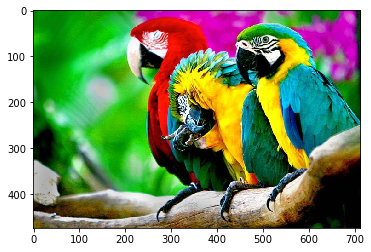

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [5]:
print(np.shape(image))

(474, 713, 3)


In [23]:
data = pd.DataFrame(image.reshape(474*713, 3), columns=['R', 'G', 'B'])
data

,R,G,B
0,0.015686,0.494118,0.019608
1,0.011765,0.490196,0.015686
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765
...,...,...,...
337957,0.000000,0.011765,0.015686
337958,0.000000,0.031373,0.035294
337959,0.023529,0.090196,0.117647
337960,0.082353,0.160784,0.203922


In [24]:
clust = KMeans(init='k-means++', random_state=241, n_jobs=-1)
y = clust.fit_predict(data)

In [25]:
data['cluster'] = y
data

,R,G,B,cluster
0,0.015686,0.494118,0.019608,4
1,0.011765,0.490196,0.015686,4
2,0.007843,0.494118,0.007843,4
3,0.007843,0.494118,0.007843,4
4,0.007843,0.501961,0.011765,4
...,...,...,...,...
337957,0.000000,0.011765,0.015686,0
337958,0.000000,0.031373,0.035294,0
337959,0.023529,0.090196,0.117647,0
337960,0.082353,0.160784,0.203922,0


Пересоберем массив пикселей

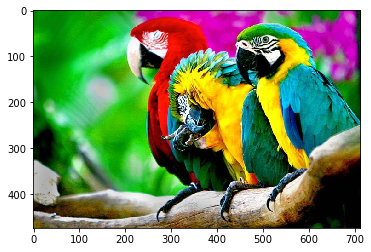

In [28]:
im2 = data.drop(columns='cluster').values.reshape((474, 713, 3))
plt.imshow(im2)

In [29]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

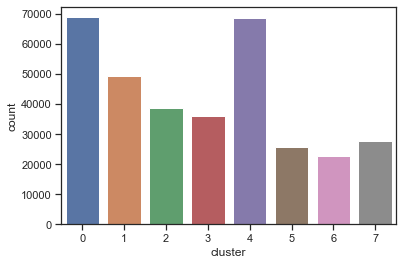

In [30]:
sns.countplot(data = data, x='cluster')

In [31]:
data1 = data.copy()

data1.R = data1.groupby('cluster')['R'].transform('mean')
data1.G = data1.groupby('cluster')['G'].transform('mean')
data1.B = data1.groupby('cluster')['B'].transform('mean')

In [32]:
data1

,R,G,B,cluster
0,0.095166,0.634676,0.066440,4
1,0.095166,0.634676,0.066440,4
2,0.095166,0.634676,0.066440,4
3,0.095166,0.634676,0.066440,4
4,0.095166,0.634676,0.066440,4
...,...,...,...,...
337957,0.053117,0.116544,0.049631,0
337958,0.053117,0.116544,0.049631,0
337959,0.053117,0.116544,0.049631,0
337960,0.053117,0.116544,0.049631,0


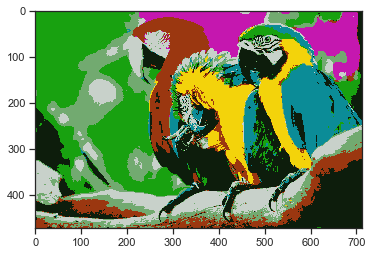

In [33]:
im3 = data1.drop(columns='cluster').values.reshape((474, 713, 3))
plt.imshow(im3)

In [38]:
data2 = data.copy()

data2.R = data2.groupby('cluster')['R'].transform('median')
data2.G = data2.groupby('cluster')['G'].transform('median')
data2.B = data2.groupby('cluster')['B'].transform('median')

In [41]:
data2

,R,G,B,cluster
0,0.054902,0.643137,0.023529,4
1,0.054902,0.643137,0.023529,4
2,0.054902,0.643137,0.023529,4
3,0.054902,0.643137,0.023529,4
4,0.054902,0.643137,0.023529,4
...,...,...,...,...
337957,0.011765,0.070588,0.011765,0
337958,0.011765,0.070588,0.011765,0
337959,0.011765,0.070588,0.011765,0
337960,0.011765,0.070588,0.011765,0


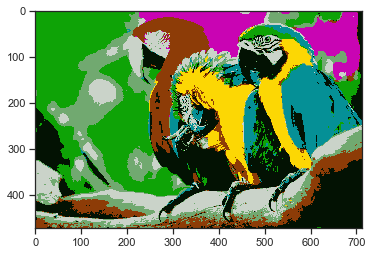

In [40]:
im4 = data2.drop(columns='cluster').values.reshape((474, 713, 3))
plt.imshow(im4)

In [42]:
from sklearn.metrics import mean_squared_error

#не нужно но пусть будет
def RGB_MSE(df_pred, df_true):
    mse_R = mean_squared_error(df_true['R'], df_pred['R'])
    mse_G = mean_squared_error(df_true['G'], df_pred['G'])
    mse_B = mean_squared_error(df_true['B'], df_pred['B'])
    return mse_R, mse_G, mse_B

In [45]:
def psnr(mse):
    return 5*np.log10(1/mse**2)

In [43]:
mse_med = mean_squared_error(data.drop(columns='cluster'), data2.drop(columns='cluster'))
mse_av = mean_squared_error(data.drop(columns='cluster'), data1.drop(columns='cluster'))


In [44]:
print(mse_med)
print(mse_av)

0.015221549291252757
0.014229361925636556


In [47]:
psnr_med = psnr(mse_med)
psnr_av = psnr(mse_av)
print(psnr_med)
print(psnr_av)

36.350822832519725
36.936291483048166


In [55]:
from skimage.metrics import peak_signal_noise_ratio

 1 cluster


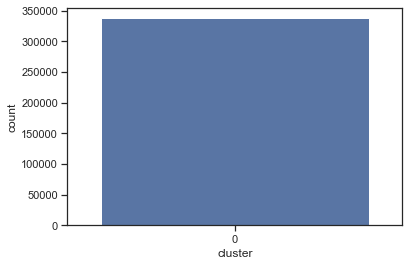

psnr for median values: 18.920816518396734
psnr for mean values: 19.675517790713858
(skimage)psnr for median values: 9.460408259198367
(skimage)psnr for mean values: 9.83775889535693
 2 cluster


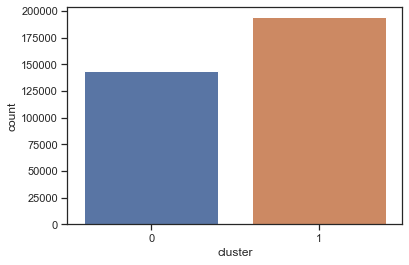

psnr for median values: 23.372463980884678
psnr for mean values: 24.224065222689735
(skimage)psnr for median values: 11.686231990442339
(skimage)psnr for mean values: 12.112032611344867
 3 cluster


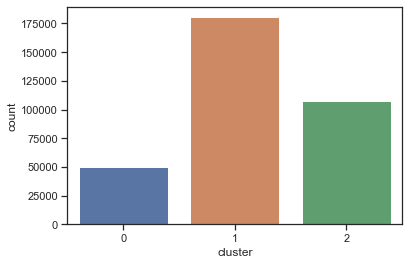

psnr for median values: 25.594081924115173
psnr for mean values: 26.352136239109388
(skimage)psnr for median values: 12.797040962057588
(skimage)psnr for mean values: 13.176068119554696
 4 cluster


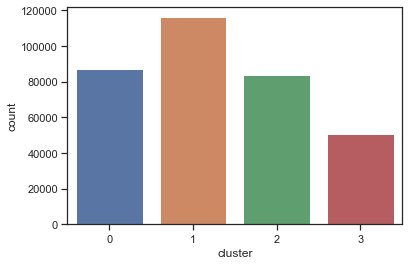

psnr for median values: 28.09284245537222
psnr for mean values: 28.788629789805942
(skimage)psnr for median values: 14.046421227686114
(skimage)psnr for mean values: 14.394314894902971
 5 cluster


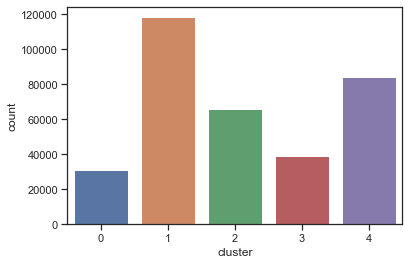

psnr for median values: 30.299245233905857
psnr for mean values: 31.115780861007927
(skimage)psnr for median values: 15.149622616952927
(skimage)psnr for mean values: 15.557890430503962
 6 cluster


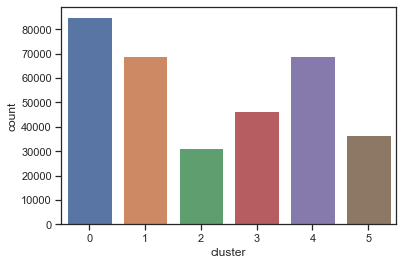

psnr for median values: 32.146328700455015
psnr for mean values: 33.14543377731225
(skimage)psnr for median values: 16.073164350227508
(skimage)psnr for mean values: 16.572716888656124
 7 cluster


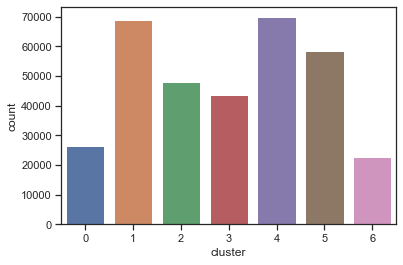

psnr for median values: 34.744744797341355
psnr for mean values: 35.34383091008825
(skimage)psnr for median values: 17.372372398670677
(skimage)psnr for mean values: 17.671915455044125
 8 cluster


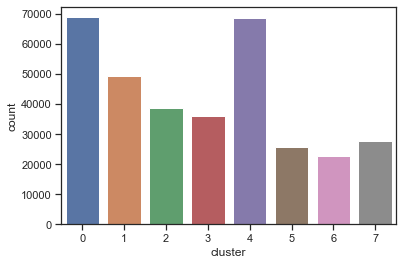

psnr for median values: 36.350822832514005
psnr for mean values: 36.93629148304726
(skimage)psnr for median values: 18.175411416257003
(skimage)psnr for mean values: 18.46814574152363
 9 cluster


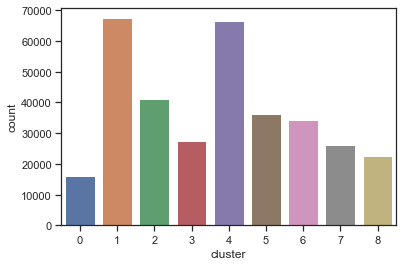

psnr for median values: 37.70155154252269
psnr for mean values: 38.289707160393
(skimage)psnr for median values: 18.850775771261343
(skimage)psnr for mean values: 19.144853580196504
 10 cluster


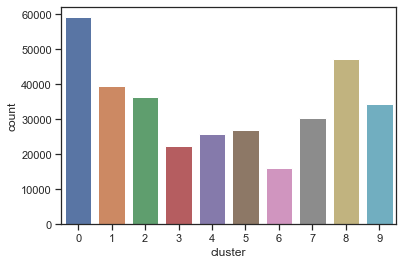

psnr for median values: 38.89215486192966
psnr for mean values: 39.34961161655552
(skimage)psnr for median values: 19.44607743096483
(skimage)psnr for mean values: 19.67480580827776
 11 cluster


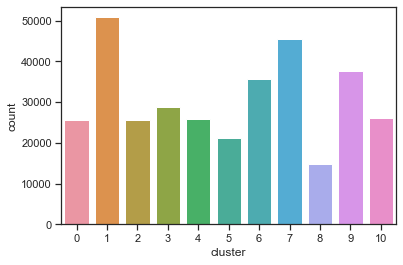

psnr for median values: 39.76908408225548
psnr for mean values: 40.32655246957414
(skimage)psnr for median values: 19.88454204112774
(skimage)psnr for mean values: 20.163276234787073
 12 cluster


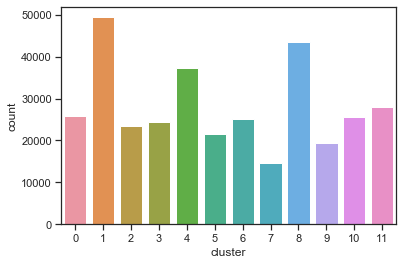

psnr for median values: 40.68513204120639
psnr for mean values: 41.26706669005365
(skimage)psnr for median values: 20.342566020603194
(skimage)psnr for mean values: 20.633533345026827
 13 cluster


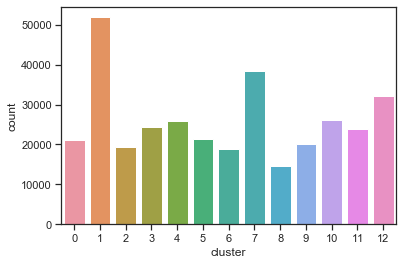

psnr for median values: 41.66657336321493
psnr for mean values: 42.122490455328446
(skimage)psnr for median values: 20.833286681607465
(skimage)psnr for mean values: 21.061245227664223
 14 cluster


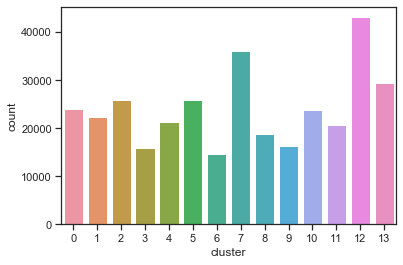

psnr for median values: 42.31798010049084
psnr for mean values: 42.735350615269105
(skimage)psnr for median values: 21.15899005024542
(skimage)psnr for mean values: 21.367675307634553
 15 cluster


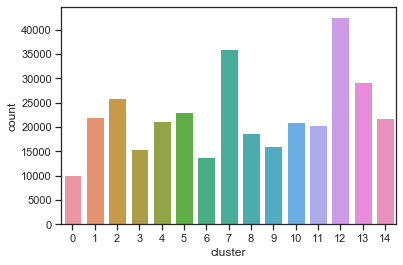

psnr for median values: 42.89748349085159
psnr for mean values: 43.289650889364076
(skimage)psnr for median values: 21.448741745425796
(skimage)psnr for mean values: 21.644825444682038
 16 cluster


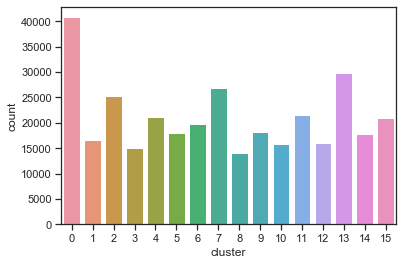

psnr for median values: 43.389921060402166
psnr for mean values: 43.80798935543447
(skimage)psnr for median values: 21.694960530201083
(skimage)psnr for mean values: 21.903994677717236
 17 cluster


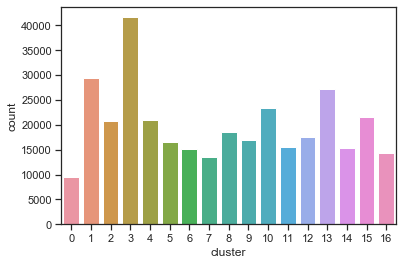

psnr for median values: 43.928237499466846
psnr for mean values: 44.33099708447132
(skimage)psnr for median values: 21.964118749733423
(skimage)psnr for mean values: 22.165498542235657
 18 cluster


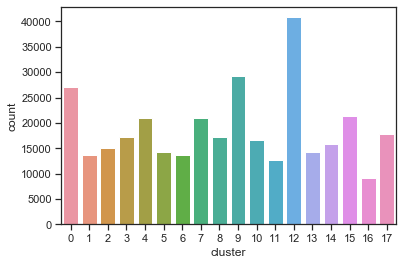

psnr for median values: 44.35765604920165
psnr for mean values: 44.75987400366734
(skimage)psnr for median values: 22.178828024600826
(skimage)psnr for mean values: 22.37993700183367
 19 cluster


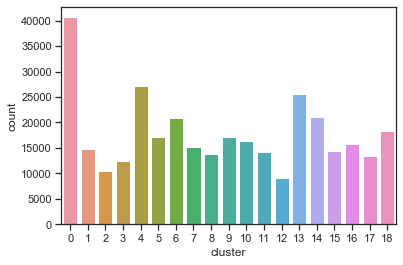

psnr for median values: 44.70415477595622
psnr for mean values: 45.121563991578526
(skimage)psnr for median values: 22.352077387978106
(skimage)psnr for mean values: 22.560781995789263
 20 cluster


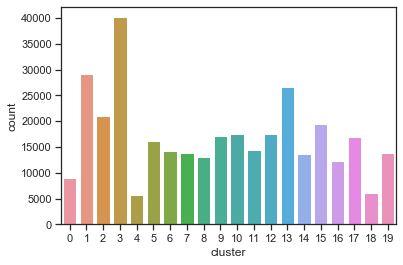

psnr for median values: 45.23427824656861
psnr for mean values: 45.53123941378321
(skimage)psnr for median values: 22.6171391232843
(skimage)psnr for mean values: 22.765619706891613


In [57]:
for n_clst in range(1, 21):
    
    print('===========================\n', '{} cluster\n'.format(n_clst), '=============================')
    
    tmp_data = data.drop(columns='cluster').copy()
    
    clust = KMeans(init='k-means++', random_state=241, n_jobs=-1, n_clusters=n_clst)
    y = clust.fit_predict(tmp_data)
    
    tmp_data['cluster']=y
    sns.countplot(data = tmp_data, x='cluster') 
    plt.show()
    
    tmp_data['R_med'] = tmp_data.groupby('cluster')['R'].transform('median')
    tmp_data['G_med'] = tmp_data.groupby('cluster')['G'].transform('median')
    tmp_data['B_med'] = tmp_data.groupby('cluster')['B'].transform('median')
    
    tmp_data['R_av'] = tmp_data.groupby('cluster')['R'].transform('mean')
    tmp_data['G_av'] = tmp_data.groupby('cluster')['G'].transform('mean')
    tmp_data['B_av'] = tmp_data.groupby('cluster')['B'].transform('mean')
    
    tmp_data.head(10)
    
    mse_med = mean_squared_error(tmp_data[['R', 'G', 'B']],
                                 tmp_data[['R_med', 'G_med', 'B_med']])
    mse_av = mean_squared_error(tmp_data[['R', 'G', 'B']],
                                 tmp_data[['R_av', 'G_av', 'B_av']])
    
    print('psnr for median values:', psnr(mse_med))
    print('psnr for mean values:', psnr(mse_av))
    
    print('(skimage)psnr for median values:', peak_signal_noise_ratio(image,
                                 tmp_data[['R_med', 'G_med', 'B_med']].values.reshape((474, 713, 3))))
    print('(skimage)psnr for mean values:', peak_signal_noise_ratio(image,
                                 tmp_data[['R_av', 'G_av', 'B_av']].values.reshape((474, 713, 3))))
    

    '''
    print('median colors:')
    img =  tmp_data[['R_med', 'G_med', 'B_med']].values.reshape((474, 713, 3))
    plt.imshow(img)
    
    print('mean colors:')
    img =  tmp_data[['R_av', 'G_av', 'B_av']].values.reshape((474, 713, 3))
    plt.imshow(img)
    '''